# Gensim LDA 

# I think i need to stem -- check this
http://brandonrose.org/clustering

--remove name entity and places 
throw out everything but the nouns)= (not proper nouns) 
and model just on the nouns 

semi supervised topic model 
prep data thru python, run it thru mallet and then back to gensim 
https://www.youtube.com/channel/UCSarHXwz_HKtiZ3vNTX1rfw

https://www.youtube.com/channel/UCSarHXwz_HKtiZ3vNTX1rfw 


In [1]:
import nltk
import matplotlib
import os
import glob
import nltk, re, pprint
import pandas as pd
from nltk import word_tokenize
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
import mpld3
import gensim 
import numpy as np

In [2]:
textFiles = glob.glob("Books/*txt")
textFiles
type(textFiles)

list

In [3]:
d = {}
for textFile in textFiles:
    d['f{0}'.format(textFile)] = open(textFile).read()
    

In [4]:
d.keys()

dict_keys(['fBooks/text_38.txt', 'fBooks/text_10.txt', 'fBooks/text_264.txt', 'fBooks/text_270.txt', 'fBooks/text_258.txt', 'fBooks/text_310.txt', 'fBooks/text_304.txt', 'fBooks/text_338.txt', 'fBooks/text_112.txt', 'fBooks/text_106.txt', 'fBooks/text_107.txt', 'fBooks/text_113.txt', 'fBooks/text_339.txt', 'fBooks/text_305.txt', 'fBooks/text_311.txt', 'fBooks/text_259.txt', 'fBooks/text_271.txt', 'fBooks/text_265.txt', 'fBooks/text_11.txt', 'fBooks/text_39.txt', 'fBooks/text_13.txt', 'fBooks/text_273.txt', 'fBooks/text_267.txt', 'fBooks/text_298.txt', 'fBooks/text_307.txt', 'fBooks/text_313.txt', 'fBooks/text_105.txt', 'fBooks/text_111.txt', 'fBooks/text_139.txt', 'fBooks/text_138.txt', 'fBooks/text_110.txt', 'fBooks/text_104.txt', 'fBooks/text_312.txt', 'fBooks/text_306.txt', 'fBooks/text_299.txt', 'fBooks/text_266.txt', 'fBooks/text_272.txt', 'fBooks/text_12.txt', 'fBooks/text_16.txt', 'fBooks/text_276.txt', 'fBooks/text_262.txt', 'fBooks/text_289.txt', 'fBooks/text_302.txt', 'fBooks

In [5]:
# convert the book titles into a list
book_titles = list(d.keys())

# convert values into a list
book_text = list(d.values())

# see first items 
book_text[0][:200]

'MAP\n\n\n\n\nMap of Henry Adams by Valerie Miller\n\n\n\n\n\nDEDICATION\n\n\nTo everyone searching for a new beginning\n\n\n\n\n\nCONTENTS\n\n\nMap\n\nDedication\n\n\n\nChapter 1\n\nChapter 2\n\nChapter 3\n\nChapter 4\n\nChapter 5\n\nChapt'

## Stopwords, stemming, and tokenizing 

This section is focused on defining some functions to manipulate the synopses. First, I load NLTK's list of English stop words. Stop words are words like "a", "the", or "in" which don't convey significant meaning. I'm sure there are much better explanations of this out there.

In [6]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Next I import the Snowball Stemmer which is actually part of NLTK. Stemming is just the process of breaking a word down into its root.

In [15]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# import these modules 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

Below I define two functions:

* tokenize_and_stem: tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token
* tokenize_only: tokenizes the synopsis only

I use both these functions to create a dictionary which becomes important in case I want to use stems for an algorithm, but later convert stems back to their full words for presentation purposes. Guess what, I do want to do that!

In [16]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


def tokenize_and_lemmatize(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lems = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lems


Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized.

In [17]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
# totalvocab_stemmed = []
# totalvocab_tokenized = []
totalvocab_lemmatized = []
for i in book_text:
#     allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
#     totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
#     allwords_tokenized = tokenize_only(i)
#     totalvocab_tokenized.extend(allwords_tokenized)
    
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)

Using these two lists, I create a pandas DataFrame with the stemmed vocabulary as the index and the tokenized words as the column. The benefit of this is it provides an efficient way to look up a stem and return a full token. The downside here is that stems to tokens are one to many: the stem 'run' could be associated with 'ran', 'runs', 'running', etc. For my purposes this is fine--I'm perfectly happy returning the first token associated with the stem I need to look up.

In [12]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_tokenized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3965132 items in vocab_frame


You'll notice there is clearly some repetition here. I could clean it up, but there are only 312209 items in the DataFrame which isn't huge overhead in looking up a stemmed word based on the stem-index

# Latent Diriechlet Allocation Models

## Latent Dirichlet Allocation¶

This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 film synopses. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models by one of the big names in the field, David Blei, available in the Communications of the ACM here. Incidentally, Blei was one of the authors of the seminal paper on LDA.

For my implementaiton of LDA, I use the Gensim pacakage. I'm going to preprocess the synopses a bit differently here, and first I define a function to remove any proper noun.

In [21]:

#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

Since the above function is just based on capitalization, it is prone to remove words at the beginning of sentences. So, I wrote the below function using NLTK's part of speech tagger. However, it took way too long to run across all synopses, so I stuck with the above.

In [22]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

Here I run the actual text processing (removing of proper nouns, tokenization, removal of stop words)

In [27]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in book_text]

#tokenize
%time tokenized_text = [tokenize_and_lemmatize(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 5min 59s, sys: 4.52 s, total: 6min 4s
Wall time: 12min 30s
CPU times: user 4min 29s, sys: 6.71 s, total: 4min 36s
Wall time: 4min 44s
CPU times: user 39.5 s, sys: 2.3 s, total: 41.8 s
Wall time: 43.2 s


Below are some Gensim specific conversions; I also filter out extreme words (see inline comment)

In [28]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

The actual model runs below. I took 100 passes to ensure convergence, but you can see that it took my machine 13 minutes to run. My chunksize is larger than the corpus so basically all synopses are used per pass. I should optimize this, and Gensim has the capacity to run in parallel. I'll likely explore this further as I use the implementation on larger corpora.

## First LDA Model

In [32]:
%time lda = models.LdaModel(corpus, num_topics=40,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 1h 44min 46s, sys: 2min 1s, total: 1h 46min 48s
Wall time: 1h 4min 4s


Each topic has a set of words that defines it, along with a certain probability.

In [33]:
lda.show_topics(40)

[(0,
  '0.000*"n\'t" + 0.000*"\'s" + 0.000*"shit" + 0.000*"\'d" + 0.000*"\'m" + 0.000*"\'re" + 0.000*"fuck" + 0.000*"apartment" + 0.000*"hospital" + 0.000*"mom"'),
 (1,
  '0.000*"shit" + 0.000*"\'s" + 0.000*"n\'t" + 0.000*"hospital" + 0.000*"\'d" + 0.000*"na" + 0.000*"apartment" + 0.000*"fi" + 0.000*"church" + 0.000*"gon"'),
 (2,
  '0.000*"n\'t" + 0.000*"shit" + 0.000*"\'s" + 0.000*"church" + 0.000*"fuck" + 0.000*"gon" + 0.000*"fi" + 0.000*"horse" + 0.000*"club" + 0.000*"mom"'),
 (3,
  '0.000*"n\'t" + 0.000*"\'s" + 0.000*"shit" + 0.000*"\'d" + 0.000*"na" + 0.000*"\'m" + 0.000*"fuck" + 0.000*"mom" + 0.000*"gon" + 0.000*"truck"'),
 (4,
  '0.000*"shit" + 0.000*"n\'t" + 0.000*"fuck" + 0.000*"\'s" + 0.000*"na" + 0.000*"fucking" + 0.000*"gon" + 0.000*"club" + 0.000*"apartment" + 0.000*"mom"'),
 (5,
  '0.004*"strolled" + 0.003*"smirked" + 0.003*"shouted" + 0.002*"winked" + 0.002*"giggled" + 0.002*"elevator" + 0.002*"traveled" + 0.002*"mon" + 0.002*"causing" + 0.002*"rocked"'),
 (6,
  '0.000*"

Here, I convert the topics into just a list of the top 20 words in each topic. You can see a similar breakdown of topics as I identified using k-means including a war/family topic and a more clearly war/epic topic.

In [38]:
topics_matrix = lda.show_topics(formatted=False, num_words=100)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

['("\'s", 1.1111408e-05)', '("n\'t", 1.11113795e-05)', "('shit', 1.1111283e-05)", "('mom', 1.1111198e-05)", "('na', 1.1111187e-05)", "('dad', 1.1111146e-05)", "('gon', 1.1111142e-05)", "('apartment', 1.1111139e-05)", '("\'d", 1.1111134e-05)', "('police', 1.1111117e-05)", "('club', 1.1111117e-05)", "('cousin', 1.1111113e-05)", "('photo', 1.1111113e-05)", "('fucking', 1.1111109e-05)", "('couch', 1.1111102e-05)", "('hospital', 1.1111094e-05)", "('fuck', 1.1111093e-05)", "('movie', 1.1111092e-05)", "('flight', 1.1111084e-05)", "('letter', 1.1111084e-05)", "('song', 1.1111084e-05)", '("\'m", 1.1111083e-05)', "('pregnant', 1.1111083e-05)", "('text', 1.1111083e-05)", "('reply', 1.1111082e-05)", "('dog', 1.1111082e-05)", "('truck', 1.1111081e-05)", "('camera', 1.1111075e-05)", "('cake', 1.11110685e-05)", "('gun', 1.11110685e-05)", "('owner', 1.1111068e-05)", "('security', 1.1111066e-05)", "('college', 1.1111066e-05)", "('despite', 1.1111065e-05)", "('client', 1.1111065e-05)", "('cook', 1.11110

# Visualize topics

In [39]:
import pyLDAvis.gensim

lda_visualization = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False, mds='mmds')


FileNotFoundError: [Errno 2] No such file or directory: 'https://cdn.rawgit.com/bmabey/pyLDAvis/files/ldavis.v1.0.0.css'

In [57]:
pyLDAvis.display(lda_visualization)

In [56]:
pyLDAvis.save_html(lda_visualization, 'lda.html')

In [46]:
lda_visualization.topic_info

,Term,Freq,Total,Category,logprob,loglift
16941,n't,12268.000000,12268.000000,Default,30.0000,30.0000
12864,'s,10826.000000,10826.000000,Default,29.0000,29.0000
24766,'d,4718.000000,4718.000000,Default,28.0000,28.0000
9613,shit,7064.000000,7064.000000,Default,27.0000,27.0000
16033,'m,2976.000000,2976.000000,Default,26.0000,26.0000
1983,mom,3155.000000,3155.000000,Default,25.0000,25.0000
2944,song,1910.000000,1910.000000,Default,24.0000,24.0000
32101,fi,1865.000000,1865.000000,Default,23.0000,23.0000
8258,fucking,3529.000000,3529.000000,Default,22.0000,22.0000
798,dad,2581.000000,2581.000000,Default,21.0000,21.0000


In [67]:
coherence = []
for k in range(5,25):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus, num_topics=k, 
               id2word = dictionary, passes=40,
               iterations=100, chunksize = 1000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(
         model=ldamodel, texts=texts,
         dictionary=dictionary, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24


In [69]:
coherence

[(5, 0.4620468844512092),
 (6, 0.525782629649261),
 (7, 0.5063341083711969),
 (8, 0.49983180163211605),
 (9, 0.4729835295354612),
 (10, 0.4383490697801246),
 (11, 0.49519479966949187),
 (12, 0.4549115020282981),
 (13, 0.4630012907312598),
 (14, 0.4830318189001028),
 (15, 0.43568665234116566),
 (16, 0.4605383067175865),
 (17, 0.46287757720415645),
 (18, 0.4516778417105851),
 (19, 0.4670034417823333),
 (20, 0.4595017957838663),
 (21, 0.3910624567714064),
 (22, 0.4686482450397725),
 (23, 0.456696541896699),
 (24, 0.4462990421184993)]

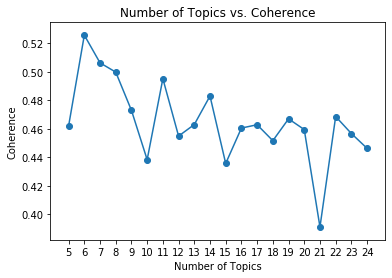

In [71]:
import matplotlib.pyplot as plt

x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [72]:
from gensim.models import CoherenceModel

# Compute Perplexity
print ('Perplexity: ', lda.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

Perplexity:  -10.419856237549853


## Second LDA model

This one will beusing the coherence model results, and use 8 topics 

In [73]:
%time lda_mod2 = models.LdaModel(corpus, num_topics=8,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 44min 42s, sys: 3min 55s, total: 48min 37s
Wall time: 30min 59s


In [76]:
lda_mod2.show_topics(8)

[(0,
  '0.030*"fi" + 0.010*"fl" + 0.004*"rst" + 0.003*"nd" + 0.003*"ed" + 0.003*"offi" + 0.003*"truck" + 0.002*"police" + 0.002*"murder" + 0.002*"ngers"'),
 (1,
  '0.142*"n\'t" + 0.124*"\'s" + 0.055*"\'d" + 0.034*"\'m" + 0.020*"\'re" + 0.020*"\'ll" + 0.016*"\'ve" + 0.008*"ca" + 0.005*"ai" + 0.004*"wo"'),
 (2,
  '0.003*"horse" + 0.002*"church" + 0.002*"slave" + 0.002*"land" + 0.002*"gown" + 0.002*"porch" + 0.002*"train" + 0.002*"folk" + 0.002*"war" + 0.002*"wagon"'),
 (3,
  '0.018*"shit" + 0.010*"gon" + 0.010*"na" + 0.010*"fuck" + 0.006*"dick" + 0.005*"nigga" + 0.005*"bitch" + 0.004*"wit" + 0.004*"pussy" + 0.004*"yo"'),
 (4,
  '0.006*"asks" + 0.004*"shit" + 0.003*"lean" + 0.002*"al" + 0.002*"fucking" + 0.002*"na" + 0.002*"mom" + 0.002*"lift" + 0.002*"dad" + 0.002*"fuck"'),
 (5,
  '0.005*"fucking" + 0.003*"cock" + 0.003*"fuck" + 0.003*"shit" + 0.003*"murmured" + 0.002*"towards" + 0.002*"couch" + 0.002*"muttered" + 0.002*"realised" + 0.002*"shoved"'),
 (6,
  '0.002*"hospital" + 0.002*"sof

In [77]:
# Compute Perplexity
print ('Perplexity: ', lda_mod2.log_perplexity(corpus)) 

Perplexity:  -9.331853193862777


## Third LDA model 

Using number of topics of 14

In [79]:
%time lda_mod3 = models.LdaModel(corpus, num_topics=14,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 46min 10s, sys: 4min, total: 50min 11s
Wall time: 39min 23s


In [80]:
# Compute Perplexity
print ('Perplexity: ', lda_mod3.log_perplexity(corpus)) 

Perplexity:  -9.500157584757874


In [81]:
lda_mod3.show_topics(14)

[(0,
  '0.003*"murmured" + 0.003*"cock" + 0.003*"fucking" + 0.002*"muttered" + 0.002*"pussy" + 0.002*"fuck" + 0.002*"shoved" + 0.002*"tugged" + 0.002*"jerked" + 0.001*"lust"'),
 (1,
  '0.004*"horse" + 0.003*"slave" + 0.003*"church" + 0.003*"wagon" + 0.003*"land" + 0.003*"gown" + 0.002*"folk" + 0.002*"porch" + 0.002*"train" + 0.002*"war"'),
 (2,
  '0.026*"shit" + 0.016*"gon" + 0.015*"fuck" + 0.015*"na" + 0.010*"nigga" + 0.008*"dick" + 0.008*"bitch" + 0.008*"wit" + 0.007*"yo" + 0.007*"wan"'),
 (3,
  '0.005*"although" + 0.003*"realised" + 0.002*"towards" + 0.002*"pregnant" + 0.002*"sexual" + 0.002*"sofa" + 0.002*"discovered" + 0.002*"security" + 0.001*"perhaps" + 0.001*"inhaled"'),
 (4,
  '0.136*"n\'t" + 0.119*"\'s" + 0.052*"\'d" + 0.033*"\'m" + 0.019*"\'re" + 0.019*"\'ll" + 0.015*"\'ve" + 0.008*"ca" + 0.005*"ai" + 0.004*"wo"'),
 (5,
  '0.009*"duke" + 0.004*"carriage" + 0.003*"horse" + 0.003*"cousin" + 0.003*"letter" + 0.002*"gown" + 0.002*"dear" + 0.002*"tugged" + 0.002*"glove" + 0.002*"

## Fourth LDA Model 

Using 20 topics

In [82]:
%time lda_mod4 = models.LdaModel(corpus, num_topics=20,id2word=dictionary, update_every=5, chunksize=1000, passes=100)

CPU times: user 48min 39s, sys: 4min 7s, total: 52min 46s
Wall time: 37min 17s


In [83]:
# Compute Perplexity
print ('Perplexity: ', lda_mod4.log_perplexity(corpus)) 

Perplexity:  -9.681872242279871


In [85]:
lda_mod4.show_topics(20)

[(0,
  '0.036*"f" + 0.005*"lawyer" + 0.005*"irst" + 0.004*"agency" + 0.003*"reporter" + 0.003*"condo" + 0.003*"medium" + 0.003*"receiver" + 0.003*"ind" + 0.003*"client"'),
 (1,
  '0.000*"shit" + 0.000*"n\'t" + 0.000*"gon" + 0.000*"fi" + 0.000*"\'s" + 0.000*"fuck" + 0.000*"truck" + 0.000*"na" + 0.000*"cousin" + 0.000*"bitch"'),
 (2,
  '0.002*"fucking" + 0.002*"apartment" + 0.001*"muttered" + 0.001*"mom" + 0.001*"murmured" + 0.001*"shit" + 0.001*"photo" + 0.001*"truck" + 0.001*"couch" + 0.001*"stage"'),
 (3,
  '0.011*"actor" + 0.008*"phaeton" + 0.008*"rally" + 0.006*"inn" + 0.006*"tub" + 0.005*"stage" + 0.005*"bath" + 0.005*"abolition" + 0.004*"reporter" + 0.004*"warehouse"'),
 (4,
  '0.002*"hospital" + 0.002*"college" + 0.002*"sofa" + 0.002*"police" + 0.002*"cook" + 0.002*"grandmother" + 0.002*"cousin" + 0.002*"movie" + 0.001*"nurse" + 0.001*"computer"'),
 (5,
  '0.018*"shit" + 0.012*"gon" + 0.011*"na" + 0.010*"fuck" + 0.007*"nigga" + 0.007*"bitch" + 0.006*"dick" + 0.006*"wit" + 0.005*"

## Visualize LDA Model 4

In [86]:
%time lda_viz4 = pyLDAvis.gensim.prepare(lda_mod4, corpus, dictionary, sort_topics=False, mds='mmds')

CPU times: user 24.3 s, sys: 44.8 s, total: 1min 9s
Wall time: 2h 46s


In [87]:
pyLDAvis.display(lda_viz4)

In [92]:
lda_viz4.topic_info

,Term,Freq,Total,Category,logprob,loglift
16941,n't,11890.000000,11890.000000,Default,30.0000,30.0000
12864,'s,10483.000000,10483.000000,Default,29.0000,29.0000
24766,'d,4572.000000,4572.000000,Default,28.0000,28.0000
9613,shit,6967.000000,6967.000000,Default,27.0000,27.0000
16033,'m,2882.000000,2882.000000,Default,26.0000,26.0000
8960,na,3815.000000,3815.000000,Default,25.0000,25.0000
8326,gon,3656.000000,3656.000000,Default,24.0000,24.0000
32101,fi,1860.000000,1860.000000,Default,23.0000,23.0000
24767,'re,1696.000000,1696.000000,Default,22.0000,22.0000
8256,fuck,4199.000000,4199.000000,Default,21.0000,21.0000
